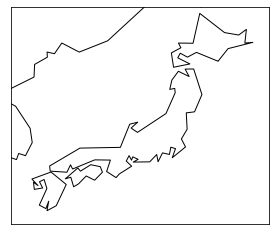

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 緯度経度で範囲を指定する
north = 46.
south = 30.
east = 147.
west = 128.

# 地図の表示
m = Basemap(llcrnrlat=south,urcrnrlat=north, llcrnrlon=west,urcrnrlon=east)
# 海岸線を引く
m.drawcoastlines() 

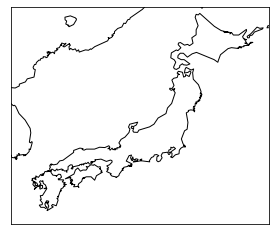

In [21]:
m = Basemap(llcrnrlat=south,urcrnrlat=north, llcrnrlon=west,urcrnrlon=east, resolution='l')
m.drawcoastlines() 

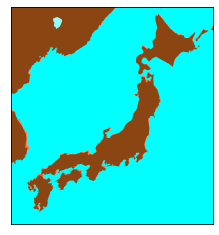

In [23]:
m = Basemap(projection='merc', llcrnrlat=south,urcrnrlat=north, llcrnrlon=west,urcrnrlon=east, resolution='l')

# 陸地を茶色に, 湖を水色に
m.fillcontinents(color='#8B4513', lake_color='#90FEFF')

# 海を濃い青に
m.drawlsmask(land_color='coral',ocean_color='aqua',lakes=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


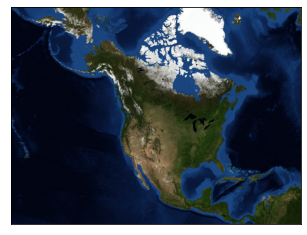

In [24]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

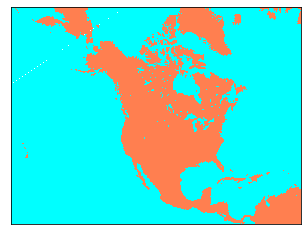

<Figure size 432x288 with 0 Axes>

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw a land-sea mask for a map background.
# lakes=True means plot inland lakes with ocean color.
m.drawlsmask(land_color='coral',ocean_color='aqua',lakes=True)
plt.show()
plt.savefig("a1.png")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

map = Basemap(llcrnrlon=129.0, llcrnrlat=29.35, urcrnrlon=147.0, urcrnrlat=45.7, projection='cyl', resolution='i', linewidth=3) 

map.drawcoastlines() #（コメント）海岸線を表示する（この行がないと地図が表示されない）

# map.drawmeridians(np.arange(0, 360, 10), linewidth=.5, color='gray', labels=[True, False, False, True]) #緯度線（0度〜360度、10度毎）
# map.drawparallels(np.arange(-80, 80, 10), linewidth=.5, color='gray', labels=[False, True, True, False]) #経度線（-80度〜80度、10度毎）

m.plot(xs, ys, color='r', linewidth=3, label='Flight 98')

#直線を描画
plt.plot([130.0,140.0],[30.0,40.0]) #直線表示([x1,x2],[y1,y2])

plt.show()

plt.savefig("a1.svg", format="svg")

TypeError: Basemap.__init__() got an unexpected keyword argument 'linewidth'

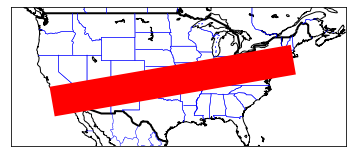

In [30]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -130,
            urcrnrlat = 50,
            urcrnrlon = -60,
            resolution='l')

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')         

xs = []
ys = []

NYClat, NYClon = 40.7127, -74.0059
xpt, ypt = m(NYClon, NYClat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'c*', markersize=15)

LAlat, LAlon = 34.05, -118.25
xpt, ypt = m(LAlon, LAlat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'g^', markersize=15)

m.plot(xs, ys, color='r', linewidth=30, label='Flight 98')

In [ ]:
import pandas as pd
Data = 202208012
for data in Data:
    csv = pd.read_csv('https://www.rikuden.co.jp/nw/denki-yoho/csv/juyo_05_%s.csv'% data)

In [10]:
import geopandas as gpd
from shapely.geometry import Point
import pyproj
import pandas as pd
import numpy as np
import re

filename = "countries.geojson"
data = gpd.read_file(filename , encoding='cp932')
data

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,,260580739,17,3028000.0,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4..."
1,1,2,Admin-0 country,2,Sovereign country,Malaysia,,31381992,15,863000.0,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
2,2,3,Admin-0 country,2,Sovereign country,Republic of Chile,,17789267,14,436100.0,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
3,3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,,11138234,14,78350.0,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."
4,4,5,Admin-0 country,2,Sovereign country,Republic of Peru,,31036656,15,410400.0,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,246,247,Admin-0 country,2,Dependency,,,300,2,0.0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Navassa Island (US),Name in italic,Other,0.085608,0.000413,"POLYGON ((-75.02432 18.41726, -75.03026 18.417..."
247,247,248,Admin-0 country,2,Dependency,,,300,2,0.0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Palmyra Atoll (US),Name in italic,Other,0.147363,0.000576,"POLYGON ((-162.06086 5.88719, -162.07136 5.890..."
248,248,249,Admin-0 country,2,Dependency,,,300,2,0.0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Kingman Reef (US),Name in italic,Other,0.059570,0.000222,"POLYGON ((-162.40018 6.44514, -162.40018 6.430..."
249,249,250,Admin-0 country,2,Country,New Zealand,,4510327,12,174800.0,...,Nya Zeeland,Yeni Zelanda,New Zealand,新西兰,Tokelau (NZ),Name in italic,Other,0.178453,0.000348,"MULTIPOLYGON (((-171.18566 -9.36126, -171.1873..."
